In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [30]:
ds=pd.read_csv('self dataset.csv')

In [31]:
ds.isnull().sum()

Day              0
Sleep Hour       0
Exercise Hour    0
Study Hour       0
StudyDS Hour     0
Work Hour        0
Feeling          0
dtype: int64

In [32]:
ds.head()

,Day,Sleep Hour,Exercise Hour,Study Hour,StudyDS Hour,Work Hour,Feeling
0,Friday,10,1.0,3,0,4,3
1,Saturday,11,2.0,4,0,6,4
2,Sunday,7,0.0,3,2,2,5
3,Monday,6,1.0,2,2,5,2
4,Tuesday,8,3.0,4,1,3,4


In [33]:
#dropped last 2 unneeded columns and a duplicate of date columns that were unnecisary 
#ds.drop(ds.columns[0],axis=1,inplace=True)
#commenting this out incase of needing restart 

In [34]:
ds.head()

,Day,Sleep Hour,Exercise Hour,Study Hour,StudyDS Hour,Work Hour,Feeling
0,Friday,10,1.0,3,0,4,3
1,Saturday,11,2.0,4,0,6,4
2,Sunday,7,0.0,3,2,2,5
3,Monday,6,1.0,2,2,5,2
4,Tuesday,8,3.0,4,1,3,4


In [35]:
ds.isnull().sum()

Day              0
Sleep Hour       0
Exercise Hour    0
Study Hour       0
StudyDS Hour     0
Work Hour        0
Feeling          0
dtype: int64

<AxesSubplot:xlabel='Sleep Hour', ylabel='Count'>

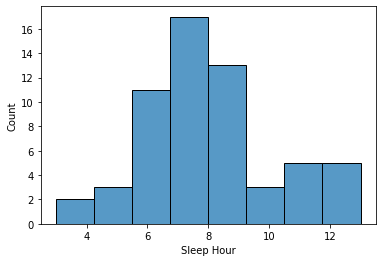

In [36]:
sns.histplot(ds['Sleep Hour'])

In [37]:
imputer=SimpleImputer(missing_values=np.nan, strategy='mean')

In [38]:
ds.head(7)
#seeing the first week (7 days = 7 rows needed) of data

,Day,Sleep Hour,Exercise Hour,Study Hour,StudyDS Hour,Work Hour,Feeling
0,Friday,10,1.0,3,0,4,3
1,Saturday,11,2.0,4,0,6,4
2,Sunday,7,0.0,3,2,2,5
3,Monday,6,1.0,2,2,5,2
4,Tuesday,8,3.0,4,1,3,4
5,Wednesday,7,1.0,3,0,5,6
6,Thursday,4,0.0,4,2,2,7


In [39]:
ds.isnull().sum()

Day              0
Sleep Hour       0
Exercise Hour    0
Study Hour       0
StudyDS Hour     0
Work Hour        0
Feeling          0
dtype: int64

In [40]:
ds['Exercise Hour']=imputer.fit_transform(ds[['Exercise Hour']])
ds['Study Hour']=imputer.fit_transform(ds[['Study Hour']])
ds['Work Hour']=imputer.fit_transform(ds[['Work Hour']])
ds['Feeling']=imputer.fit_transform(ds[['Feeling']])
ds['StudyDS Hour']=imputer.fit_transform(ds[['StudyDS Hour']])
ds['Sleep Hour']=imputer.fit_transform(ds[['Sleep Hour']])

In [41]:
ds.isnull().sum()

Day              0
Sleep Hour       0
Exercise Hour    0
Study Hour       0
StudyDS Hour     0
Work Hour        0
Feeling          0
dtype: int64

In [42]:
X=pd.get_dummies(ds[['Day',"Sleep Hour","Exercise Hour",'Study Hour','StudyDS Hour',"Work Hour"]])

In [43]:
X.head()
#assigning X allows us to test and run machine learning without changing or inturupting any data from og dataset 

,Sleep Hour,Exercise Hour,Study Hour,StudyDS Hour,Work Hour,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday
0,10.0,1.0,3.0,0.0,4.0,1,0,0,0,0,0,0
1,11.0,2.0,4.0,0.0,6.0,0,0,1,0,0,0,0
2,7.0,0.0,3.0,2.0,2.0,0,0,0,1,0,0,0
3,6.0,1.0,2.0,2.0,5.0,0,1,0,0,0,0,0
4,8.0,3.0,4.0,1.0,3.0,0,0,0,0,0,1,0


In [44]:
ds.head()
#original dataset unchanged

,Day,Sleep Hour,Exercise Hour,Study Hour,StudyDS Hour,Work Hour,Feeling
0,Friday,10.0,1.0,3.0,0.0,4.0,3.0
1,Saturday,11.0,2.0,4.0,0.0,6.0,4.0
2,Sunday,7.0,0.0,3.0,2.0,2.0,5.0
3,Monday,6.0,1.0,2.0,2.0,5.0,2.0
4,Tuesday,8.0,3.0,4.0,1.0,3.0,4.0


In [45]:
y=ds[["Feeling"]]

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.8,random_state=12)

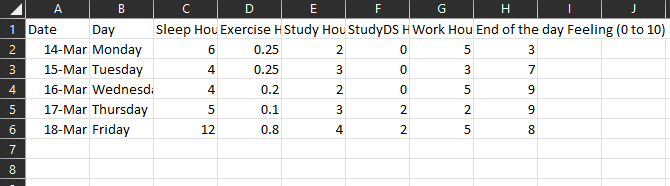

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [49]:
print('Coefficioents',regressor.coef_)

Coefficioents [[-2.00000000e+00 -3.78138424e-15 -1.35537878e-15 -2.94876345e-15
   1.23423423e+00 -5.74774775e+00 -5.98198198e+00  6.78378378e+00
   2.72072072e+00 -1.27927928e+00  3.48648649e+00  1.80180180e-02]]


In [50]:
print('Intercept',regressor.intercept_)

Intercept [13.81081081]


In [51]:
X.head()

,Sleep Hour,Exercise Hour,Study Hour,StudyDS Hour,Work Hour,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday
0,10.0,1.0,3.0,0.0,4.0,1,0,0,0,0,0,0
1,11.0,2.0,4.0,0.0,6.0,0,0,1,0,0,0,0
2,7.0,0.0,3.0,2.0,2.0,0,0,0,1,0,0,0
3,6.0,1.0,2.0,2.0,5.0,0,1,0,0,0,0,0
4,8.0,3.0,4.0,1.0,3.0,0,0,0,0,0,1,0


In [52]:
y_pred=regressor.predict(X_test)

# Predict Values for Excel

In [60]:
# Monday Case 1
regressor.predict([[6,1,2,0,5,0,1,0,0,0,0,0]])

array([[2.]])

In [61]:
# Tuesday Case 2
regressor.predict([[4,1,3,0,3,0,0,0,0,0,1,0]])

array([[13.]])

In [63]:
# Wednesday Case 3
regressor.predict([[4,2,2,0,5,0,0,0,0,0,0,1]])

array([[12.]])

In [64]:
# Thursday Case 4 
regressor.predict([[5,1,3,2,2,0,0,0,0,1,0,0]])

array([[5.]])

In [66]:
# Friday Case 5
regressor.predict([[12,1,4,2,5,8,1,0,0,0,0,0]])

array([[-55.98198198]])

# R2

In [53]:
from sklearn.metrics import r2_score

In [54]:
print('r2-score',r2_score(y_test,y_pred))

r2-score -12.671314428951897


In [55]:
import statsmodels.api as sm
X=sm.add_constant(X)
model=sm.OLS(y,X).fit()

In [56]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Feeling   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     1.255
Date:                Tue, 22 Mar 2022   Prob (F-statistic):              0.282
Time:                        12:03:07   Log-Likelihood:                -108.86
No. Observations:                  59   AIC:                             239.7
Df Residuals:                      48   BIC:                             262.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.8495      0.714      3.990      0.000       1.413       4.286
Sleep Hour       -0.1017      0.161     -0.632      0.530      -0.425       0.222
Exercise Hour    -0.8406      0.440     -1.908      0.062      -1.726       0.045
Study Hour        0.0873      0.242      0.361      0.720      -0.400       0.574
StudyDS Hour     -0.4232      0.318     -1.329      0.190      -1.063       0.217
Work Hour         0.9174      0.236      3.884      0.000       0.443       1.392
Day_Friday       -0.5787      0.627     -0.923      0.361      -1.839       0.682
Day_Monday       -0.2690      0.649     -0.415      0.680      -1.573       1.035
Day_Saturday     -1.2892      0.497     -2.595      0.013      -2.288      -0.290
Day_Sunday        1.8038      0.604      2.988      0.004       0.590       3.017
Day_Thursday      1.3036      0.692      1.883      0.066      -0.089       2.696
Day_Tuesday       1.6486      0.618      2.666      0.010       0.405       2.892
Day_Wednesday     0.2304      0.629      0.366      0.716      -1.034       1.495
==============================================================================
Omnibus:                        0.650   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.722   Jarque-Bera (JB):                0.725
Skew:                          -0.069   Prob(JB):                        0.696
Kurtosis:                       2.474   Cond. No.                     1.59e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.09e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""